In [ ]:
#5.Visualising geospatial data using geopandas
#a) Reading the world shapefile
#b) Calculating the area of each country
#c) Removing Antarctica from Geopandas dataframe
#d)Changing the projection
#e)Recalculating the area in sq.km
#f)Adding a 
#g)Resizing the legend

In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#1. Reading world shape file
world=gpd.read_file(r'F:\python\RS_GIS_Python\world_shapefiles\world.shp')
world.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [3]:
world.shape

(246, 12)

In [4]:
type(world)

geopandas.geodataframe.GeoDataFrame

<Axes: >

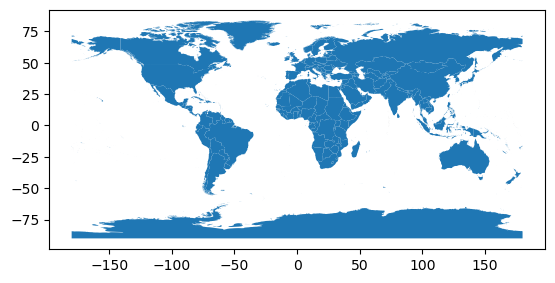

In [5]:
world.plot()

In [6]:
#As there are 12 column which are not required for analysis, we will consider 2 columns for our analysis
#Selecting particular columns from the data
world=world[['NAME','geometry']]
world.shape

(246, 2)

In [7]:
world.columns

Index(['NAME', 'geometry'], dtype='object')

<Axes: >

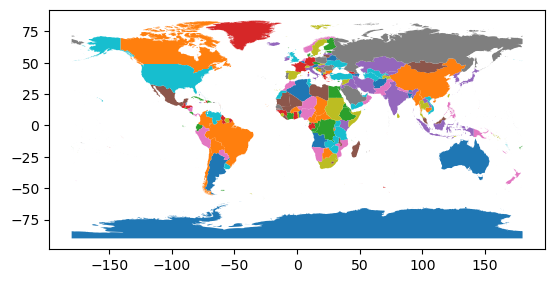

In [8]:
world.plot(column='NAME')

In [9]:
#2.Lets create a area column in world data
#Calculating the area of each column
world['Area']=world.area
world.head()

C:\Users\suchi\AppData\Local\Temp\ipykernel_24000\447177112.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['Area']=world.area


,NAME,geometry,Area
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0.046183
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",213.512502
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",9.100912
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",3.075918
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",3.142093


In [11]:
#3. Removing Antarctica from Geopandas dataframe
world=world[world['NAME']!='Antarctica']
world.shape
#Intitally there are 246 rows, after the removal of Antarctica, there are 245 rows

(245, 3)

<Axes: >

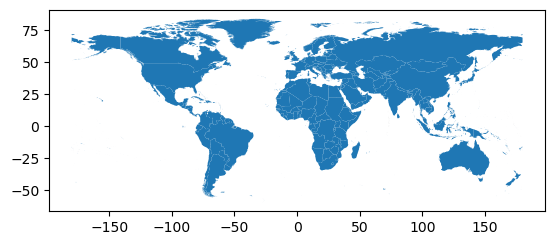

In [12]:
world.plot()

In [14]:
#4. Changing the projection
current_crs=world.crs
print('Current crs:',current_crs)

Current crs: EPSG:4326


<Axes: >

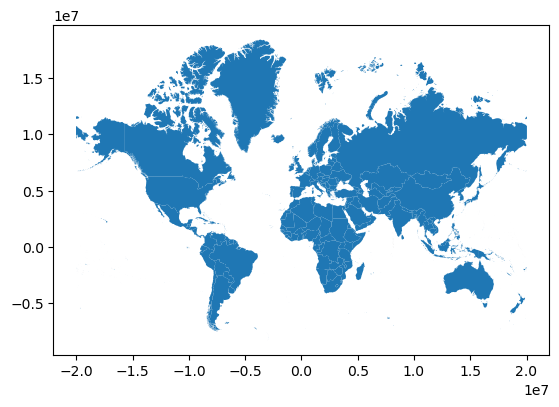

In [16]:
#epsg codes from epsg.io
#epsg=3857 for Pseudo-Mercator -spherical Mercator (units:m)
# used by many users, google maps
reprojected=world.to_crs(epsg=3857,inplace=True)
world.plot()

<Axes: >

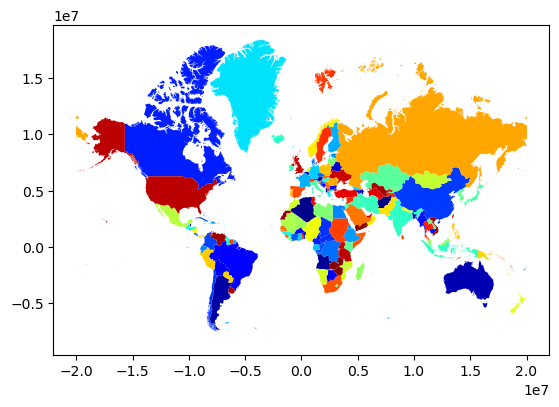

In [17]:
world.plot(column='NAME', cmap='jet')

In [18]:
#5. Recalculating the area in sq.km
world['area_sq.km']=world.area/1000000
world.head()

,NAME,geometry,Area,area_sq.km
0,Antigua and Barbuda,"MULTIPOLYGON (((-6866928.470 1923670.302, -687...",0.046183,5.993606e+02
1,Algeria,"POLYGON ((329907.556 4411573.988, 331886.705 4...",213.512502,3.014479e+06
2,Azerbaijan,"MULTIPOLYGON (((5018652.337 4832292.097, 50390...",9.100912,1.478874e+05
3,Albania,"POLYGON ((2163629.445 5015449.243, 2165225.767...",3.075918,5.062603e+04
4,Armenia,"MULTIPOLYGON (((5073168.831 4958283.927, 50682...",3.142093,5.104906e+04


<Axes: >

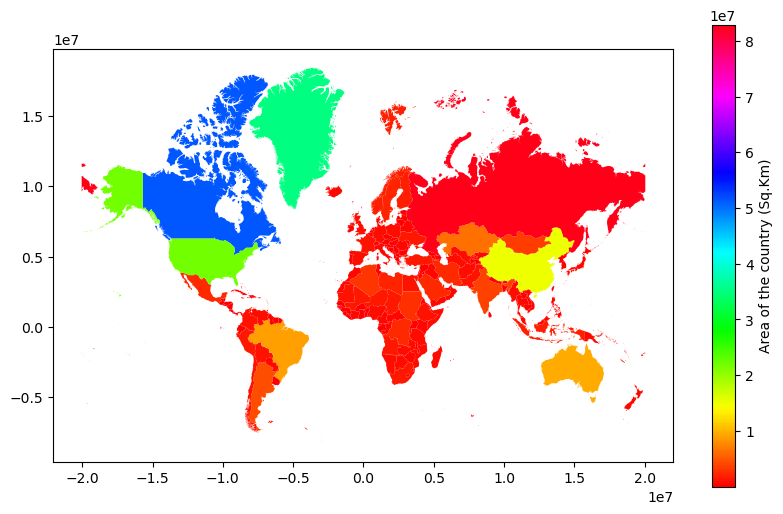

In [22]:
#6.Adding legend to the plot
world.plot(figsize=(10,6),column='area_sq.km',cmap='hsv',legend=True, legend_kwds={'label':"Area of the country (Sq.Km)"})

<Axes: >

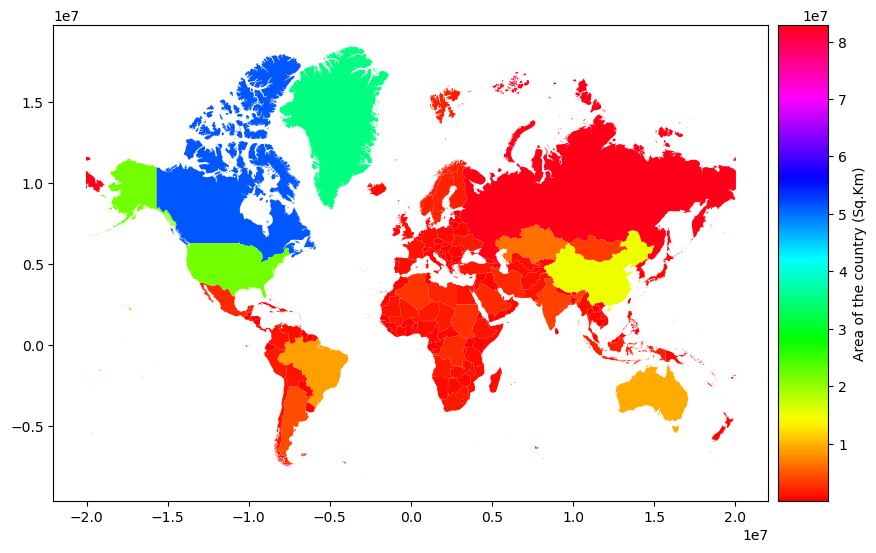

In [29]:
#As this legend was not fitting properly we can use mpl_toolkits
# 7.Resizing the legend
fig,ax=plt.subplots(figsize=(10,10))
divider=make_axes_locatable(ax)
cax=divider.append_axes("right", size="7%", pad=0.1) #position of legend
world.plot(column='area_sq.km',cmap='hsv',legend=True, 
           legend_kwds={'label':"Area of the country (Sq.Km)"},
          ax=ax,cax=cax)